In [1]:
import os 
import json
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from utils import get_json_data, load_history

In [8]:
history_dir_path = 'testing_files\epochs_data4\history'
epochs = [5, 6, 10, 12, 13, 15, 20, 26, 35, 46, 92, 98, 114, 297, 308, 324, 325, 329, 335, 353, 354, 410, 1095, 1254, 1257, 1674, 2172, 2458]
size = [2500]
folds = 1

In [4]:
def load_history(history_dir_path, sizes, folds=5):
    history_form = 'history_ep{}_k{}.json'
    data = {}
    for size in sizes:
        data[str(size)] = {}
        for fold in range(folds):
            json_history = os.path.join(history_dir_path, history_form.format(size, fold))
            data[str(size)][str(fold)] = get_json_data(json_history)
    return data

In [22]:
#path = 'testing_files\\size_64\\history\\history_ep2500_k0.json'
history2 = get_json_data('testing_files\epochs_data4\history\history_ep[2458, 5000]_k0.json')
history = load_history(history_dir_path, size, folds)

In [25]:
history2.keys()

dict_keys(['train', 'val'])

In [23]:
history['2500']['0'].keys()

dict_keys(['train', 'val'])

In [24]:
history = history['2500']['0']

In [14]:
def plot_loss(history):
    plt.figure(figsize=(15, 10))
    epochs = len(history['train']['loss'])
    plt.plot(range(epochs)[10:], history['train']['loss'][10:], label='train_loss')
    plt.legend()
    plt.plot(range(epochs)[10:], history['val']['loss'][10:], label='val_loss')
    plt.legend()
    plt.grid('on')

def plot_auc(history):
    plt.figure(figsize=(15, 10))
    epochs = len(history['train']['loss'])
    plt.plot(range(epochs)[10:], history['train']['auc'][10:], label='train_auc')
    plt.legend()
    plt.plot(range(epochs)[10:], history['val']['auc'][10:], label='val_auc')
    plt.legend()
    plt.grid('on')

In [15]:
def plot_history_loss(model_history):
    fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    row = 0
    for fold, history in model_history.items():
        epochs = len(history['train']['loss'])
        col = int(fold) % 3
        axs[row, col].plot(range(epochs)[10:], history['train']['loss'][10:], label='_train_loss')
        axs[row, col].legend()
        axs[row, col].plot(range(epochs)[10:], history['val']['loss'][10:], label='val_loss')
        axs[row, col].set(title=str(int(fold) + 1))
        axs[row, col].grid('on')     
        axs[row, col].legend()
        if col == 2:
            row += 1

def plot_model_history(model_history): 
    for fold, history in model_history.items():
        plt.figure(figsize=(7, 5))
        epochs = len(history['loss'])
        plt.plot(range(epochs), history['loss'], label='loss')
        plt.plot(range(epochs), history['acc'], label='acc')
        plt.plot(range(epochs), history['auc'], label='auc')
        plt.title(str(int(fold) +1))
        plt.grid('on')
        plt.legend()

def subplot_model_history(model_history, save_path=None):
    fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    row = 0
    for fold, history in model_history.items():
        epochs = len(history['loss'])
        col = int(fold) % 3
        axs[row, col].plot(range(epochs), history['loss'], label='loss')
        axs[row, col].plot(range(epochs), history['acc'], label='acc')
        axs[row, col].plot(range(epochs), history['auc'], label='auc')
        axs[row, col].set(title=str(int(fold) + 1))
        axs[row, col].grid('on')
        axs[row, col].legend()
        if col == 2:
            row += 1
    if save_path:
        fig.savefig(os.path.join(save_path[0], save_path[1]))

def subplot_loss_last_100(model_history, save_path=None):
    plt.figure(figsize=(25, 15))
    for fold, history in model_history.items():
        loss = history['loss'][400:]
        epochs = len(loss)
        plt.plot(range(epochs), loss, label='loss' + fold)
        plt.title('last 100 epochs loss')
        plt.grid('on')
        plt.legend()
    if save_path:
        plt.savefig(os.path.join(save_path[0], save_path[1]))

In [11]:
history['val'].keys()

dict_keys(['loss', 'rmse', 'acc', 'auc'])

In [27]:
[1,2,7,8] + [3,1,4,5]

[1, 2, 7, 8, 3, 1, 4, 5]

In [28]:
len(history2['val']['loss'])

2542

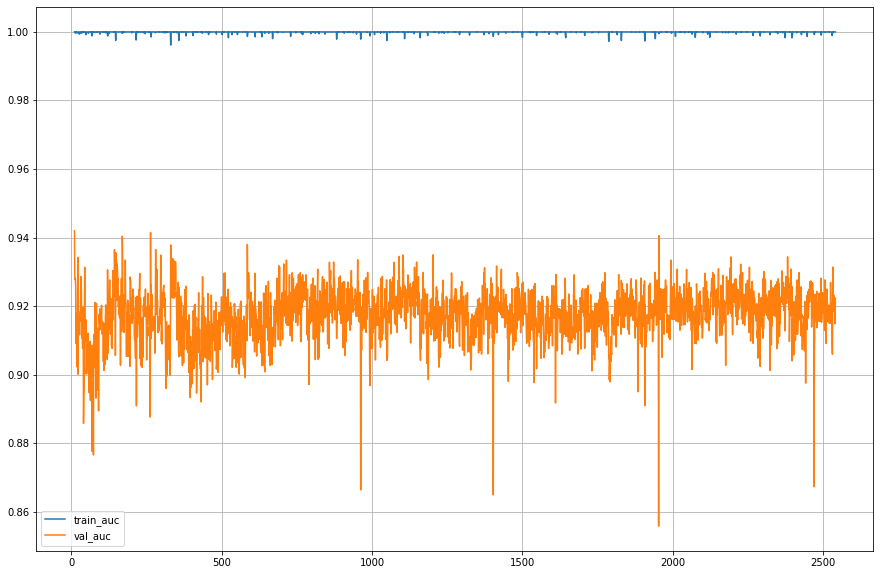

In [50]:
plot_auc(history2)

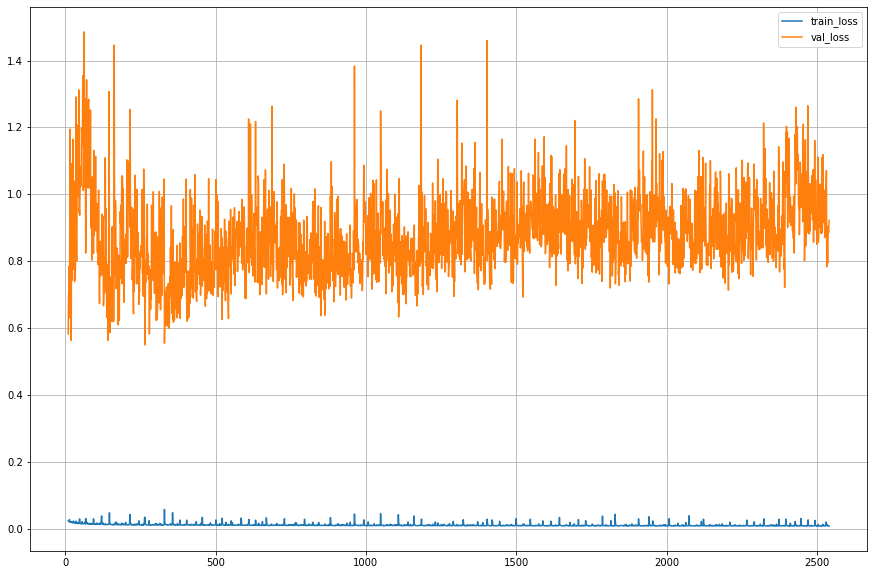

In [26]:
plot_loss(history2)

In [30]:
len(history['val']['loss'] + history2['val']['loss'])

5000

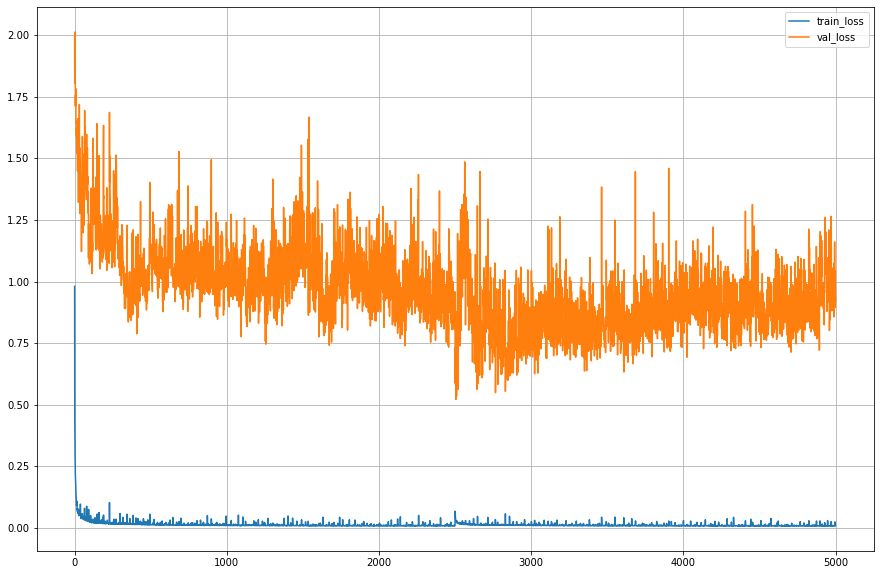

In [32]:
plt.figure(figsize=(15, 10))
plt.plot(range(5000), history['train']['loss'] + history2['train']['loss'][:2500], label='train_loss')
plt.legend()
plt.plot(range(5000), history['val']['loss'] + history2['val']['loss'][:2500], label='val_loss')
plt.legend()
plt.grid('on')

In [40]:
min_loss = [history['val']['loss'][ep-1] for ep in epochs]

In [34]:
history2['val']['loss'][5]

[0.5993722081184387,
 0.587315559387207,
 0.7316507697105408,
 0.5817699432373047,
 0.743929386138916,
 0.5217528343200684,
 0.6834903955459595,
 0.8767303228378296,
 0.8029881119728088,
 0.5347662568092346,
 0.5821033120155334,
 0.7029088139533997,
 0.7003947496414185,
 0.7855448126792908,
 0.6307862997055054,
 0.9199247360229492,
 1.1950749158859253,
 0.7296510338783264,
 0.8386916518211365,
 1.054091215133667]

In [41]:
min_loss.append(history2['val']['loss'][0])
min_loss.append(history2['val']['loss'][1])
min_loss.append(history2['val']['loss'][3])
min_loss.append(history2['val']['loss'][5])

In [42]:
epochs.append(2459)
epochs.append(2460)
epochs.append(2462)
epochs.append(2464)

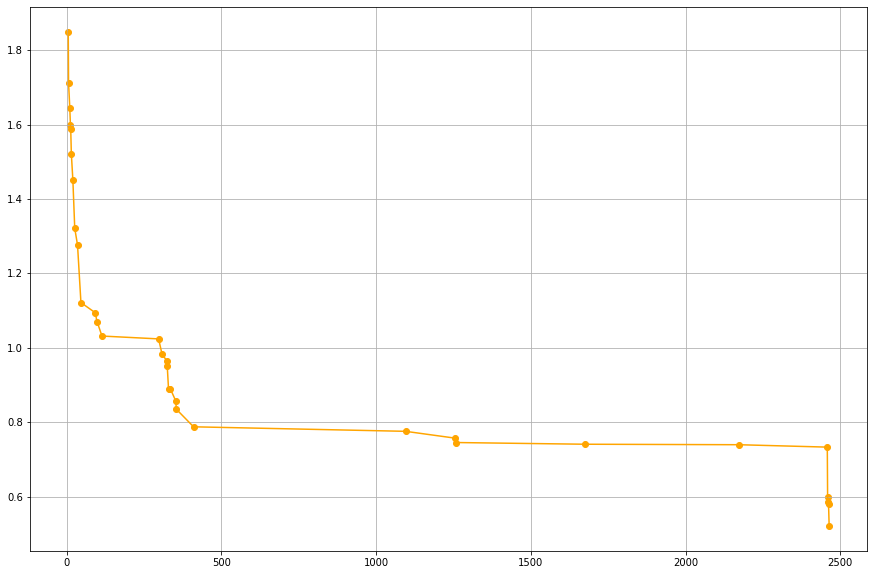

In [48]:
plt.figure(figsize=(15, 10))
plt.plot(epochs, min_loss, c='orange')
plt.scatter(epochs, min_loss, c='orange')
plt.grid('on')

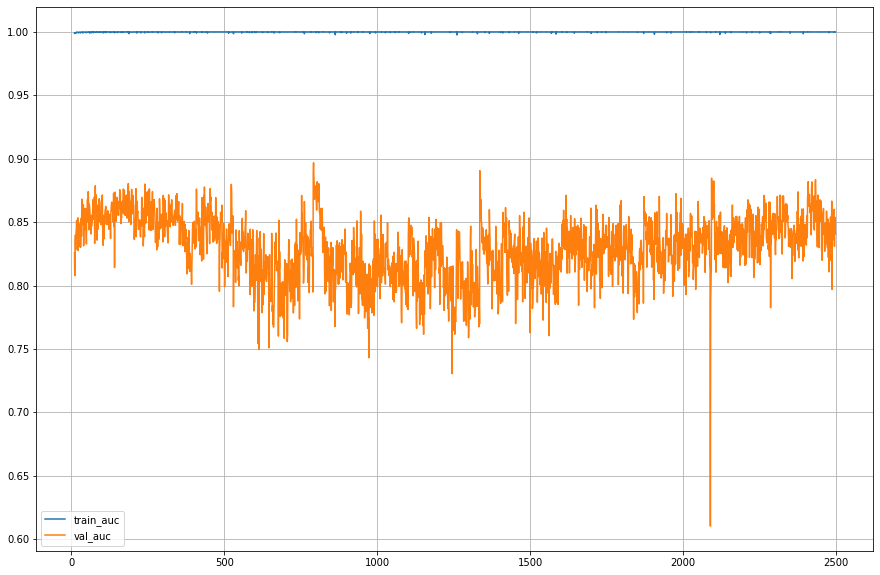

In [18]:
plot_auc(history)

In [118]:
best_ep = np.argmin(history_ratio['1']['1']['loss'])
best_loss = history_ratio['1']['1']['loss'][best_ep]
print(best_loss)

0.05066250264644623


In [24]:
def get_min_loss(history_mdels):
    data = {'train': {'loss': []}, 'val': {'loss': []}}
    for fold, history in history_mdels.items():
        train_ep = np.argmin(history['train']['loss'])
        data['train']['loss'].append([train_ep, 
                                      history['train']['loss'][train_ep]])
        val_ep = np.argmin(history['val']['loss'])
        data['val']['loss'].append([val_ep, 
                                    history['val']['loss'][val_ep]])
        #data['epochs'].append(np.argmin(history['loss']))
        #data['min_loss'].append(history['loss'][data['epochs'][-1]])
        #data['auc'].append(history['auc'][data['epochs'][-1]])
        #data['acc'].append(history['acc'][data['epochs'][-1]])
    return data

In [27]:
minloss_ep500 = get_min_loss(h_ep500)
minloss_ep1000 = get_min_loss(h_ep1000)
minloss_ep1500 = get_min_loss(h_ep1500)

In [26]:
minloss_ep500

{'train': {'loss': [[459, 0.0005211179959587753],
   [464, 0.003365844953805208],
   [236, 0.0013768374919891357],
   [429, 0.0012958062579855323],
   [439, 0.0012090192176401615]]},
 'val': {'loss': [[116, 0.00586018618196249],
   [26, 0.008121569640934467],
   [289, 0.0020834309980273247],
   [41, 0.0074968235567212105],
   [17, 0.007228183094412088]]}}

In [28]:
minloss_ep1000

{'train': {'loss': [[174, 0.0003881472803186625],
   [993, 0.0003398667904548347],
   [996, 0.0017187451012432575],
   [539, 0.0017746861558407545],
   [987, 0.0009230836876668036]]},
 'val': {'loss': [[639, 2.3438456082658377e-06],
   [352, 7.726396688667592e-06],
   [663, 1.874918666544545e-06],
   [698, 4.2498409129620995e-06],
   [282, 1.6770705769886263e-05]]}}

In [29]:
minloss_ep1500

{'train': {'loss': [[904, 0.0003646169789135456],
   [1476, 0.0013617300428450108],
   [718, 0.00036575374542735517],
   [523, 0.0001527865679236129],
   [1496, 0.00033945468021556735]]},
 'val': {'loss': [[929, 2.500800633242761e-07],
   [1368, 3.91933639320996e-07],
   [1166, 5.765184027950454e-07],
   [754, 7.777450150570075e-07],
   [1477, 3.568810029719316e-07]]}}

In [141]:
len(bestloss_ratio1['min_loss'])

5

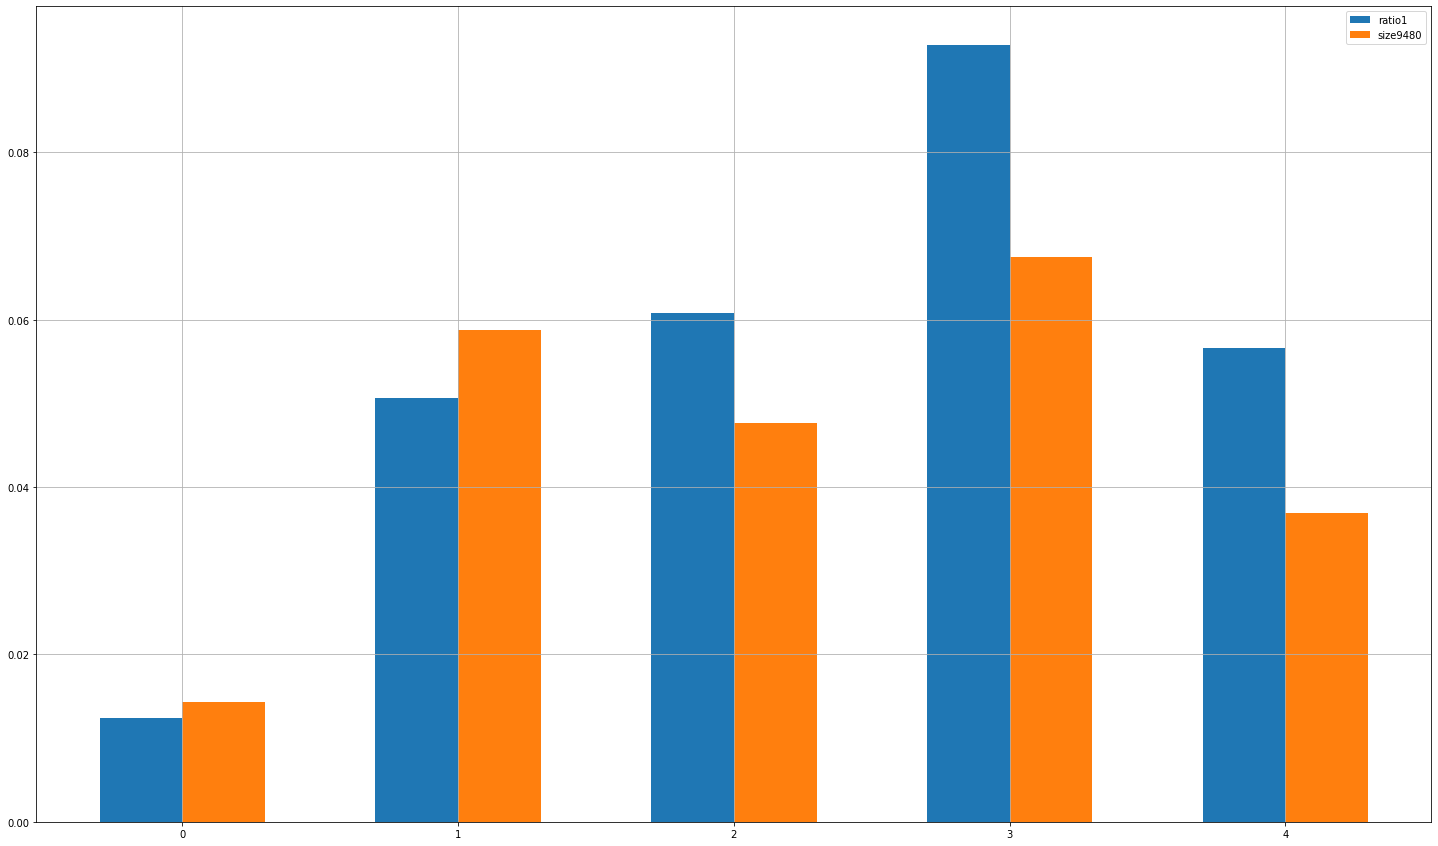

In [145]:
fig, axs = plt.subplots(figsize=(25, 15))
width = 0.3
rects1 = axs.bar(np.arange(len(bestloss_ratio1['min_loss'])) - width/2, bestloss_ratio1['min_loss'], width, label='ratio1')
rects2 = axs.bar(np.arange(len(bestloss_size9480['min_loss'])) + width/2, bestloss_size9480['min_loss'], width, label='size9480')
axs.grid('on')
axs.legend()